In [1]:
# import os
# os.environ['DATA_READER_VENDOR'] = 'tiingo'
%pylab inline
from app.analysis import Quote
quote = Quote(Quote.screen_securities(min_assets=12, min_ratio=10, max_ratio=40), 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
from 2019-01-31 to 2019-07-31 - 386


In [2]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > .2) & (stats['len'] == stats['len'].max())]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

153


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
QCOM,122,0.363292,1.750578,0.202993,50.822284,26.789112
CPRT,122,0.351226,0.530604,0.646978,53.130549,3.758168
KMX,122,0.325926,0.647159,0.491363,49.302491,4.699798
BX,122,0.325592,0.760285,0.417811,47.579581,9.449767
HSY,122,0.307963,0.414391,0.724018,44.750213,3.101510
MSI,122,0.293322,0.643809,0.443276,43.036929,3.958331
SBUX,122,0.287639,0.443670,0.630430,40.337177,4.459689
SNPS,122,0.285135,0.532731,0.520335,42.217458,7.924003
FLT,122,0.281763,0.567867,0.482203,40.810672,8.989413


In [3]:
ratios = []
for _ in range(6):
    quote.setup_mask(set(stats.index) - {s for r in ratios for s in r})
    _, rt = quote.optimize_portfolio().peekitem()
    ratios.append(rt)
ratios

evicted MKC 0.538 -0.123
evicted BLK 0.835 -0.176
evicted PAYX 0.612 -0.169
evicted DRE 0.838 -0.129
evicted AJG 0.677 0.000
evicted AVB 0.822 -0.384
evicted SYK 0.762 -0.282
evicted ETR 0.881 -0.269
evicted ROP 0.728 -0.074
evicted RSG 0.610 -0.221
evicted CB 0.664 -0.113
evicted ATO 0.781 -0.257
evicted CSCO 0.767 -0.259
evicted TRV 0.704 -0.184
evicted ED 0.800 -0.260
evicted TMO 0.720 -0.294
evicted ES 0.869 -0.220
evicted AEP 0.850 -0.295
evicted SPGI 0.832 -0.056
evicted WMT 0.565 -0.211
evicted CNI 0.685 -0.226
evicted DEO 0.667 -0.318
evicted NEE 0.784 -0.303
evicted WM 0.654 -0.155
evicted TROW 0.737 -0.083
evicted MDLZ 0.701 -0.148
evicted L 0.646 -0.071
evicted ACGL 0.672 -0.063
evicted AFL 0.629 -0.122
evicted MMC 0.658 -0.100
evicted PLD 0.601 -0.065
evicted CL 0.716 -0.162
evicted PG 0.642 -0.118
evicted AME 0.758 -0.146
evicted BAM 0.595 -0.065
evicted TJX 0.641 -0.264
evicted LH 0.697 -0.297
evicted CINF 0.668 -0.211
evicted CCEP 0.462 -0.194
evicted IBM 0.685 -0.111
ev

[{'CPRT': 0.222, 'HSY': 0.268, 'JCI': 0.286, 'WRB': 0.225},
 {'CTAS': 0.215, 'KMX': 0.247, 'WEC': 0.538},
 {'COST': 0.314, 'MKC': 0.359, 'SBUX': 0.327},
 {'NEE': 0.483, 'SNN': 0.259, 'VMC': 0.257},
 {'LDOS': 0.259, 'MCD': 0.473, 'SRE': 0.268},
 {'APD': 0.524, 'EXR': 0.206, 'FLT': 0.269}]

{'CPRT': 0.07, 'HSY': 0.09, 'JCI': 0.1, 'WRB': 0.07, 'COST': 0.1, 'MKC': 0.12, 'SBUX': 0.11, 'LDOS': 0.09, 'MCD': 0.16, 'SRE': 0.09}


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.235818,0.192612,-0.227253,0.113717,0.220363,0.350031,0.810722,1.183115,32.439837,1.763737
WRB,122.0,0.249909,0.332061,-0.539419,0.028167,0.238734,0.419013,1.128321,0.728701,36.885098,2.734322
HSY,122.0,0.307963,0.414391,-0.545597,0.025669,0.250437,0.543236,1.489761,0.724018,44.750213,3.101510
CPRT,122.0,0.351226,0.530604,-0.538409,0.035621,0.270450,0.563379,1.990528,0.646978,53.130549,3.758168
SBUX,122.0,0.287639,0.443670,-0.713621,0.051017,0.260308,0.437730,1.944984,0.630430,40.337177,4.459689
MKC,122.0,0.226006,0.374082,-0.662037,-0.030977,0.223290,0.438958,1.513139,0.582945,29.163224,4.543731
MCD,122.0,0.161588,0.280481,-0.610200,-0.001399,0.157071,0.321785,0.973327,0.547814,19.310588,2.999196
COST,122.0,0.231808,0.421413,-0.744212,-0.027001,0.201695,0.455210,1.522429,0.531240,29.115626,4.141156
LDOS,122.0,0.274887,0.519750,-0.798440,0.009409,0.200074,0.398622,2.238656,0.513613,42.847172,3.457477
JCI,122.0,0.180143,0.377866,-0.637762,-0.122026,0.165116,0.432685,1.256046,0.455733,27.422164,3.603832


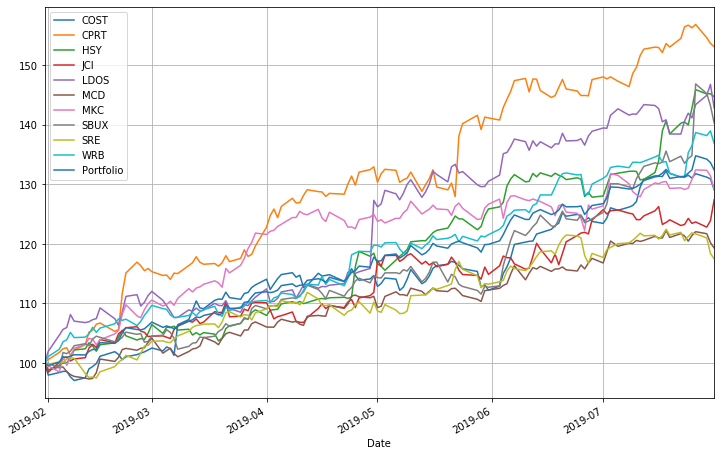

In [4]:
ratios = [
{'CPRT': 0.222, 'HSY': 0.268, 'JCI': 0.286, 'WRB': 0.225},
{'COST': 0.314, 'MKC': 0.359, 'SBUX': 0.327},
{'LDOS': 0.259, 'MCD': 0.473, 'SRE': 0.268},
]
ratio = {}
for rt in ratios:
    for s in rt:
        ratio[s] = round(rt[s] / len(ratios), 2)
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)